In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_curve, auc

In [2]:
adata = sc.read("/data/mr423/project/data/3-OLINK_data_train_withOutlier_all.h5ad")
adata_test = sc.read("/data/mr423/project/data/3-OLINK_data_test_withOutlier_all.h5ad")

In [3]:
adata.obs

,sex,DoB_Year,DoB_Month,DoB_Day,DoB,Date_Attend,age,Age_Group
Id,,,,,,,,
2144829,0,1939,1,15,1939-01-15,2007-11-16,68.835044,60-70
3154285,0,1945,1,15,1945-01-15,2007-07-20,62.507871,60-70
1679423,1,1945,11,15,1945-11-15,2009-05-19,63.507187,60-70
1172610,1,1941,12,15,1941-12-15,2009-09-23,67.772758,60-70
4011532,1,1954,1,15,1954-01-15,2009-10-20,55.761807,50-60
...,...,...,...,...,...,...,...,...
1137580,1,1957,5,15,1957-05-15,2007-08-14,50.247775,50-60
3378384,0,1950,4,15,1950-04-15,2009-06-27,59.200548,50-60
1220136,0,1945,6,15,1945-06-15,2008-11-11,63.408624,60-70


In [4]:
data = pd.read_csv("/data/mr423/project/data/3-OLINK_data_train_all_norm.csv")
data_test = pd.read_csv("/data/mr423/project/data/3-OLINK_data_test_all_norm.csv")

In [5]:
data=data.set_index('Id')
data_test=data_test.set_index('Id')

In [7]:
data

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
2144829,0.156103,0.335547,0.130100,0.312544,0.369321,0.394242,0.256869,0.120990,0.572979,0.133999,...,0.190428,0.267989,0.075229,0.412949,0.301072,0.344849,0.171964,0.181050,0.097833,0.312948
3154285,0.199054,0.219478,0.149049,0.246452,0.450077,0.638855,0.354410,0.444193,0.496786,0.158452,...,0.247382,0.136232,0.000000,0.392001,0.391468,0.231631,0.186254,0.199211,0.122182,0.291977
1679423,0.278870,0.456557,0.126842,0.204109,0.371411,0.340023,0.244802,0.000000,0.502113,0.132524,...,0.233903,0.230272,0.106472,0.549238,0.274063,0.236622,0.165966,0.195700,0.083087,0.236544
1172610,0.373436,0.208746,0.147052,0.273067,0.336058,0.224401,0.200446,0.456935,0.578152,0.204918,...,0.187864,0.131574,0.057009,0.386624,0.155575,0.286401,0.142100,0.180326,0.637118,0.282086
4011532,0.357472,0.517743,0.163302,0.211867,0.412568,0.374036,0.354062,0.149790,0.481530,0.210503,...,0.167596,0.202356,0.138311,0.551349,0.509913,0.290553,0.119132,0.191383,0.152645,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137580,0.327009,0.399850,0.150827,0.258535,0.394191,0.350602,0.364919,0.250173,0.588624,0.174877,...,0.190039,0.176876,0.124582,0.528691,0.397152,0.227137,0.144267,0.172892,0.090240,0.213467
3378384,0.251506,0.102156,0.152737,0.183943,0.455254,0.386770,0.324112,0.206436,0.539626,0.129014,...,0.187422,0.089019,0.112425,0.219653,0.130143,0.244557,0.155585,0.162137,0.205746,0.245806
1220136,0.200175,0.254228,0.190802,0.166639,0.397900,0.369949,0.240567,0.306946,0.597404,0.117963,...,0.156285,0.127781,0.081268,0.412508,0.262803,0.276575,0.116787,0.140523,0.137852,0.231372


找出索引的交集和差异

In [8]:
index_data = data.index
index_data_test = data_test.index

common_index = index_data.intersection(index_data_test)
common_index

Index([], dtype='int64', name='Id')

In [9]:
y_target = adata.obs['sex']
y_test = adata_test.obs['sex']

In [10]:
# 分割数据为训练集和测试集
X_train, X_val, y_train, y_val = train_test_split(data, y_target, test_size=0.2,random_state=28)

In [11]:
model = LogisticRegression(
        # penalty = None,
        # solver = 'newton-cg',
        max_iter=1000
)

In [12]:
# initial_weights = model.coef_ if model.coef_ is not None else np.zeros(X_train.shape[1])

In [13]:
# model = LogisticRegression(max_iter=1, warm_start=True)  # 使用warm_start=True以便多次调用fit方法

# # 记录每次迭代的损失值
# losses = []

# for i in range(1, 21):  # 假设我们进行100次迭代
#     model.max_iter = i
#     model.fit(X_train, y_train)
#     y_val_pred_proba = model.predict_proba(X_val)
#     loss = log_loss(y_val, y_val_pred_proba)
#     losses.append(loss)

# # 绘制损失值
# plt.plot(range(1, 21), losses, marker='o')
# plt.xlabel('Iteration')
# plt.ylabel('Log Loss')
# plt.title('Log Loss vs. Iteration')
# plt.grid(True)
# plt.show()

In [22]:
# cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# # 打印交叉验证分数
# print(f"交叉验证准确率: {cv_scores}")
# # print(f"平均交叉验证准确率: {cv_scores.mean()}"

In [14]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# 获取实际收敛的迭代次数
actual_iterations = model.n_iter_[0]

print("实际收敛的迭代次数: ", actual_iterations)

实际收敛的迭代次数:  46


In [16]:
# 获取训练后的权重
weights = model.coef_

print(weights.shape)

# 展示权重矩阵
print("weights after training: ", weights)

# 展平权重矩阵并找出最大值的位置
num_top_weights = 10  # 你想找出的最大值数量
flat_weights = weights.flatten()
top_indices = np.argpartition(flat_weights, -num_top_weights)[-num_top_weights:]
top_indices_sorted = top_indices[np.argsort(-flat_weights[top_indices])]

# 显示最大值及其位置
print("Top {} weight and position:".format(num_top_weights))
for idx in top_indices_sorted:
    position = np.unravel_index(idx, weights.shape)
    print("position: {}, weight: {:.4f}".format(position, flat_weights[idx]))

(1, 2919)
weights after training:  [[-0.06499007  0.02077658  0.03770404 ...  0.00342299 -0.11212776
  -0.00027379]]
Top 10 weight and position:
position: (0, 990), weight: 6.0192
position: (0, 1485), weight: 5.4929
position: (0, 2525), weight: 3.3147
position: (0, 454), weight: 3.1460
position: (0, 1894), weight: 3.1176
position: (0, 2740), weight: 2.8650
position: (0, 2883), weight: 2.5105
position: (0, 904), weight: 1.9711
position: (0, 415), weight: 1.8760
position: (0, 1374), weight: 1.7503


In [17]:
data.columns[top_indices_sorted]

Index(['SPINT3', 'INSL3', 'ACRV1', 'PSPN', 'KLK3', 'CRISP2', 'EDDM3B',
       'TEX101', 'PROK1', 'OBP2B'],
      dtype='object')

## 评估模型

### Result for train

In [18]:
y_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Train Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Train Accuracy: 0.9995643869584158
Confusion Matrix:
 [[16203     3]
 [   10 13627]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16206
           1       1.00      1.00      1.00     13637

    accuracy                           1.00     29843
   macro avg       1.00      1.00      1.00     29843
weighted avg       1.00      1.00      1.00     29843



### Result for val

In [19]:
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Validation Accuracy: 0.9989277576732342
Confusion Matrix:
 [[3994    2]
 [   6 3459]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       1.00      1.00      1.00      3465

    accuracy                           1.00      7461
   macro avg       1.00      1.00      1.00      7461
weighted avg       1.00      1.00      1.00      7461



### Result for test

In [20]:
y_test_pred = model.predict(data_test)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Test Accuracy: 0.9987937273823885
Confusion Matrix:
 [[2211    3]
 [   2 1929]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2214
           1       1.00      1.00      1.00      1931

    accuracy                           1.00      4145
   macro avg       1.00      1.00      1.00      4145
weighted avg       1.00      1.00      1.00      4145



In [21]:
# # 绘制ROC曲线
# y_test_pred_proba = model.predict_proba(data_test)[:, 1]
# fpr, tpr, _ = roc_curve(y_test_pred, y_test_pred_proba)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()


Feature 990     6.019243
Feature 1485    5.492863
Feature 557     4.290528
Feature 2525    3.314651
Feature 454     3.146033
Feature 1894    3.117583
Feature 1673    2.915710
Feature 2740    2.864957
Feature 2834    2.715424
Feature 2883    2.510523
dtype: float64


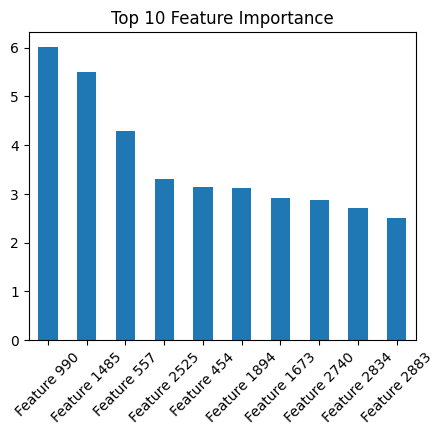

In [22]:
# 特征重要性分析
feature_importance = pd.Series(model.coef_[0], index=[f"Feature {i}" for i in range(data.shape[1])])

# 只显示最重要的10个特征
top_features = feature_importance.abs().sort_values(ascending=False).head(10)
top_features = top_features.sort_values(ascending=False)

print(top_features)

# 可视化特征的重要性
plt.figure(figsize=(5, 4))
top_features.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 10 Feature Importance')
plt.show()

In [23]:
top_feature_indices = top_features.index
top_feature_indices = [int(feat.split()[1]) for feat in top_feature_indices]

data.columns[top_feature_indices]

Index(['SPINT3', 'INSL3', 'LEP', 'ACRV1', 'PSPN', 'KLK3', 'FSHB', 'CRISP2',
       'CGA', 'EDDM3B'],
      dtype='object')

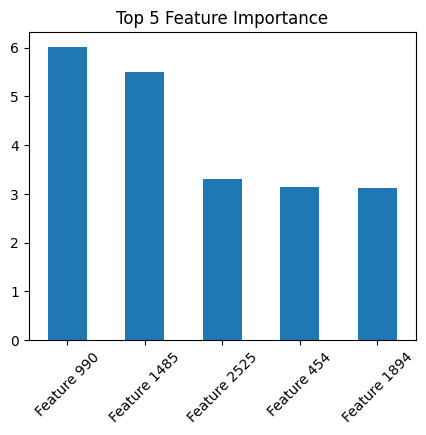

In [24]:
# 找到特征的增加会增加预测为正类的概率的前5个特征
positive_influence_features = feature_importance.sort_values(ascending=False).head(5)


# 可视化特征的重要性
plt.figure(figsize=(5, 4))
positive_influence_features.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 5 Feature Importance')
plt.show()

In [25]:
positive_influence_features_indices = positive_influence_features.index
positive_influence_features_indices = [int(feat.split()[1]) for feat in positive_influence_features_indices]

data.columns[positive_influence_features_indices]

Index(['SPINT3', 'INSL3', 'ACRV1', 'PSPN', 'KLK3'], dtype='object')

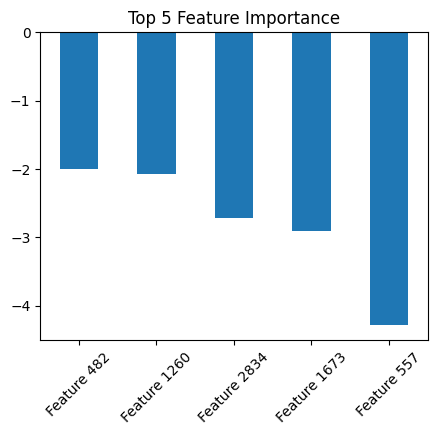

In [26]:
# 找到特征的增加会减少预测为负类的概率的前5个特征
negative_influence_features = feature_importance.sort_values(ascending=False).tail(5)

# 可视化特征的重要性
plt.figure(figsize=(5, 4))
negative_influence_features.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 5 Feature Importance')
plt.show()

In [27]:
negative_influence_features_indices = negative_influence_features.index
negative_influence_features_indices = [int(feat.split()[1]) for feat in negative_influence_features_indices]

data.columns[negative_influence_features_indices]

Index(['XG', 'PZP', 'CGA', 'FSHB', 'LEP'], dtype='object')